<h1><center>CSE391 programming for data science</center></h1>

<h1><center>Lecture 10</center></h1>
<h1><center>Feb 21th ,2018 </center></h1>



 # Jupyter notebook tip of the day
 # IPython Magic - High-resolution plot outputs for Retina notebooks

x = range(1000)
y = [i ** 2 for i in x]
plt.plot(x,y)
plt.show();

%config InlineBackend.figure_format = 'retina'
plt.plot(x,y)
plt.show();

# Machine learning at a glance

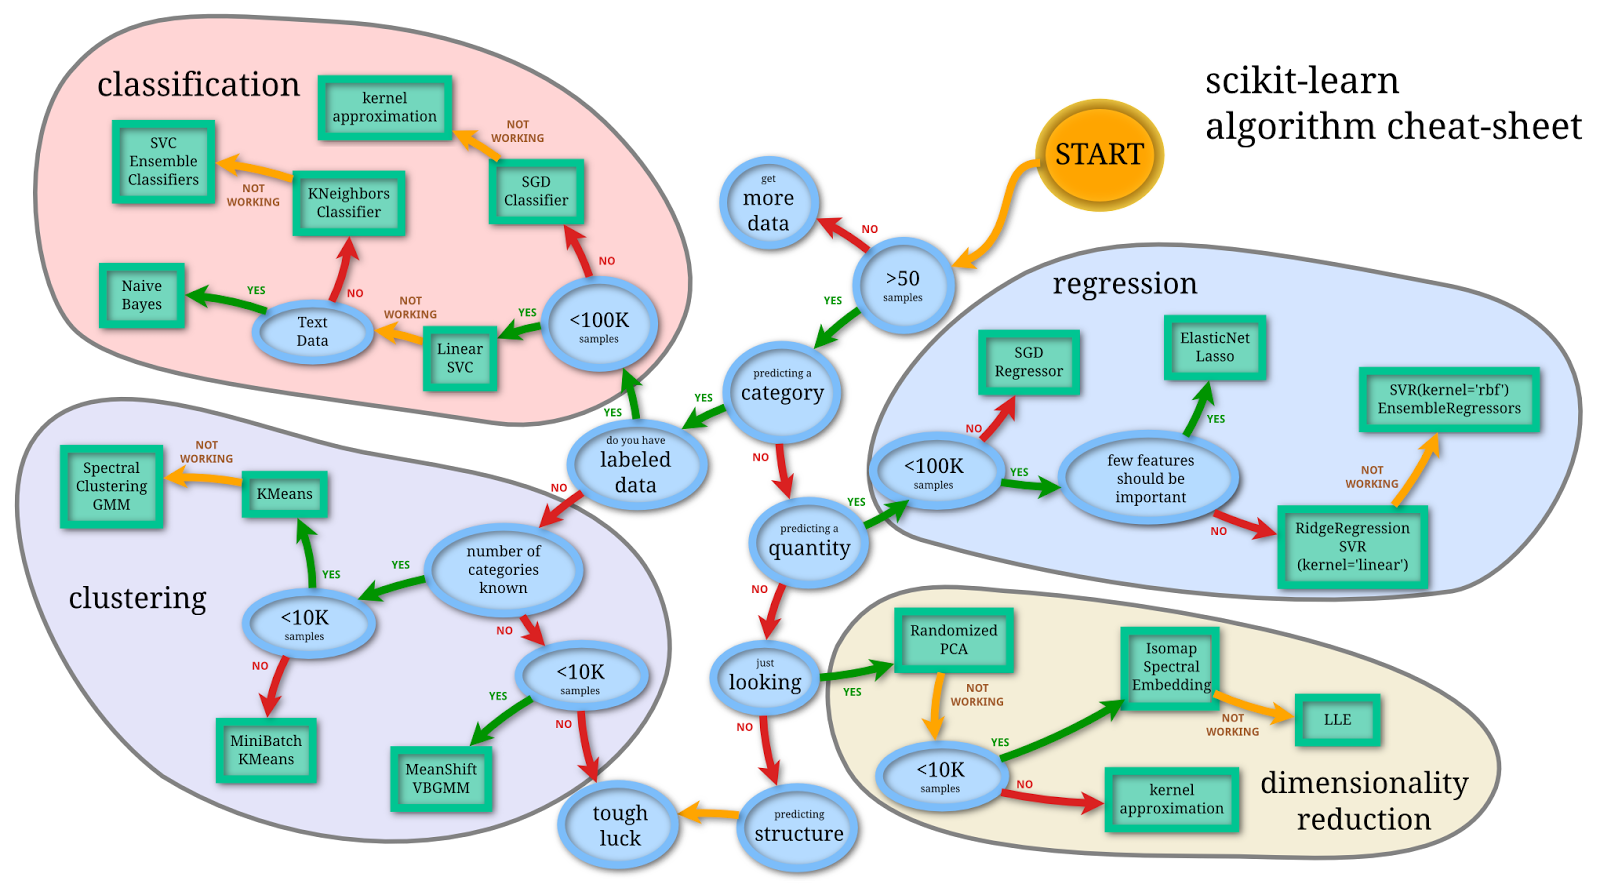

In [1]:
from IPython.display import Image
Image(filename ='/Users/martin/Documents/MyLecturesSBU/Spring2018/CSE391/data/MLcheatsheet.png',width=1200,height=1200)

# Quadratic form of polynomial in  matrix form for vectorization 
# An n-ary quadratic form over a field K is a homogeneous polynomial of degree 2 in n variables with coefficients in K:

$\huge  q_A(x_1,\ldots,x_n) = \displaystyle \sum_{i=1}^n \sum_{j=1}^n a_{ij}x_i x_j = x^{T}A x$

# Mahalanobis distance
- dissimilarity measure between two random vectors ${\displaystyle {\underline {x}}}$ and ${\displaystyle {}} \underline{y}$ of the same distribution with the covariance matrix S:

$\huge d(x,y)= \sqrt{(x-y)^T S^{-1}(x-y)}$

 # Basic Slicing and Indexing¶

In [ ]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x[1:7:2]

#  Negative i and j are interpreted as n + i and n + j where n is the number of elements in the corresponding dimension. Negative k makes stepping go towards smaller indices.

In [ ]:
 x[-2:10]

In [ ]:
x[-3:3:-1]

In [ ]:
x[5:]

## what is the dimension of this array

 x = np.array([[[1],[2],[3]], [[4],[5],[6]]])

In [ ]:
 x = np.array([[1,2,3], [4,5,6]])


# Two-Dimensional Slicing
-It is common to split your loaded data into input variables (X) and the output variable (y)

 # For the input features, we can select all rows and all columns except the last one by specifying ‘:’ for in the rows index, and :-1 in the columns index.

In [ ]:
x = np.random.randint(1,10,[2,3])
y = x[:,:-1]
print(x)
print(y)

# For the output column, we can select all rows again using ‘:’ and index just the last column by specifying the -1 index.

In [ ]:
y = x[:,-1]
y

In [ ]:
from numpy import array
# define array
data = array([[11, 22, 33],
		[44, 55, 66],
		[77, 88, 99]])
# separate data
X, y = data[:, :-1], data[:, -1]
print(X)
print(y)

# Pandas highlights
- A fast and efficient DataFrame object 
- Tools for reading and writing data between in-memory data structures and different formats
- Intelligent data alignment and integrated handling of missing data
- Flexible reshaping and pivoting of data sets;
- Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
- Columns can be inserted and deleted from data structures 
- Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
- Time series-functionality: date range generation and frequency conversion, moving window statistics, moving - window linear regressions, date shifting and lagging. Even create domain-specific time offsets and join time series without losing data;
- Highly optimized for performance, with critical code paths written in  C.


# Jupyter notebook tip of the day
## Debugging in Jupyter notebook

In [ ]:
def add_to_life_universe_everything(x):
    answer = 42
    import pdb; pdb.set_trace()
    # we want a breakpoint here
    answer += x
    
    return answer

add_to_life_universe_everything(12)

# Introduction to pandas series

In [1]:
import pandas as pd
import numpy as np

data = np.random.randn(5)
index = ['a','b','c','d','e']
S = pd.Series(data, index)
print(S)


a    0.420490
b   -1.448786
c    1.037105
d   -0.297420
e    1.819690
dtype: float64


# Note 1 on series
- If data is a dict, if index is passed the values in data corresponding to the labels in the index will be pulled out. Otherwise, an index will be constructed from the sorted keys of the dict, if possible.

In [2]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [3]:
pd.Series(d, index=['b', 'c', 'd', 'a'])


b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

# Series are much like arrays.
- valid arguments to most NumPy functions
- series is like dict
- Key difference between Array and Series

# Vectorized operations and label alignment with Series

In [5]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s+s
s*s

a    0.001187
b    0.152606
c    2.447825
d    0.951420
e    3.927580
dtype: float64

# Key difference between array and series
- Series automatically align the data based on label

In [6]:
s[1:]+s[:-1]

a         NaN
b   -0.781297
c   -3.129106
d    1.950815
e         NaN
dtype: float64

#  series name attribute
- Series can also have a name attribute:

In [7]:
s = pd.Series(np.random.randn(5), name='something')

s.name

'something'

# The most import Pandas data object: Data frames
- 2-dimensional labeled data structure with columns of potentially different types

# Data frame acceptable inputs:
- Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- Structured or record ndarray
- A Series
- Another DataFrame

In [9]:
DF1 = pd.DataFrame(np.random.randint(low=0, high=10, size=(5, 5)),
                   columns=['a', 'b', 'c', 'd', 'e'])
DF1


,a,b,c,d,e
0,5,3,8,3,8
1,6,6,1,5,0
2,0,8,9,6,7
3,8,9,0,2,0
4,8,1,7,1,3


In [10]:
DF1 = pd.DataFrame(np.random.randint(low=0, high=10, size=(5, 5)),
                   index = ['t1','t2','t3','t4','t5'],
                   columns=['a', 'b', 'c', 'd', 'e'])
DF1

,a,b,c,d,e
t1,9,7,6,3,0
t2,0,8,7,8,0
t3,2,5,2,3,4
t4,5,4,5,1,9
t5,3,4,1,5,6


# Column selection, addition , deletion

In [22]:
# sum
DF1['f'] = DF1['a']+DF1['d']
DF1

DF1.del['d']






SyntaxError: invalid syntax (<ipython-input-22-eb804bf6dbfe>, line 5)

In [21]:
df = pd.DataFrame([('falcon', 'bird',    389.0),
...                    ('parrot', 'bird',     24.0),
...                    ('lion',   'mammal',   80.5),
...                    ('monkey', 'mammal', np.nan)],
...                   columns=('name', 'class', 'max_speed'))

x = df.pop('class')
x

0      bird
1      bird
2    mammal
3    mammal
Name: class, dtype: object

# Loading and Handling Time Series in Pandas


# Working on AirPassengers data set:
- The classic Box & Jenkins airline data. Monthly totals of international airline passengers, 1949 to 1960.

- source AARSHAY JAIN 



# first step

In [ ]:
import pandas as pd
import numpy as np
import datetime as dtime
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# Now, we can load the data set and look at some initial rows and data types of the columns:

In [24]:
filepath = '/Users/martin/Documents/MyLecturesSBU/Spring2018/CSE391/data/AirPassengers.csv'
data = pd.read_csv(filepath)
print(data.head(10))
print('\n Data Types:')
print(data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121
5  1949-06          135
6  1949-07          148
7  1949-08          148
8  1949-09          136
9  1949-10          119

 Data Types:
Month          object
#Passengers     int64
dtype: object


In [25]:
?pd.read_csv